## Binary Classification on the Bank Datasets

The dataset comes from the UCI Machine Learning repository (http://archive.ics.uci.edu/ml/index.php), and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution.

The **classification goal** is to predict whether the client will subscribe to a term deposit (variable $y$, (1/0)). The dataset can be downloaded from: https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.

*Input variables*

1. age (numeric)
2. job: type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital: marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)

*Predict variable* (desired target):

* has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("banking.csv", header=0)
data = data.dropna()

print(data.shape)
data.describe()

(41188, 21)


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [3]:
print(data["education"].unique())

['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']


In [4]:
object_columns = data.columns[data.dtypes.eq('object')]

data[object_columns] = data[object_columns].apply(pd.to_numeric, errors='coerce')

In [5]:
print(data["education"].unique())

[nan]


In [6]:
data.dropna(axis=1, inplace=True)

print("Shape is: ", data.shape)

Shape is:  (41188, 11)


In [7]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

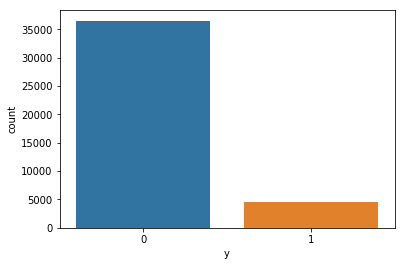

In [8]:
sns.countplot(x = 'y', data = data)
plt.show()

In [9]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])

pct_of_no_sub = count_no_sub / (count_no_sub+count_sub)
print("No subscriptions (%): ", pct_of_no_sub * 100)

pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Subscription (%): ", pct_of_sub * 100)

No subscriptions (%):  88.73458288821988
Subscription (%):  11.265417111780131


In [10]:
cols = data.columns.values.tolist()
print(cols)
print(len(cols))

X = data[cols[0:10]].values
y_true = data['y'].values

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
11


### StandardScaler (standardize features by removing the mean and scaling to unit variance)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train/Test Splitter

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_true, test_size=0.3, random_state=0)

## Feedforward Neural Network

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Ultra-basic two layers network

In [14]:
model = Sequential()
model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
adamLooksForRoberto = keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=adamLooksForRoberto, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, epochs=100, batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
28831/28831 [==============================] - 3s 120us/step - loss: 0.2570 - acc: 0.9019
Epoch 2/100
28831/28831 [==============================] - 3s 90us/step - loss: 0.2025 - acc: 0.9102
Epoch 3/100
28831/28831 [==============================] - 3s 90us/step - loss: 0.1991 - acc: 0.9087
Epoch 4/100
28831/28831 [==============================] - 3s 89us/step - loss: 0.1977 - acc: 0.9094
Epoch 5/100
28831/28831 [==============================] - 3s 89us/step - loss: 0.1971 - acc: 0.9090
Epoch 6/100
28831/28831 [==============================] - 3s 89us/step - loss: 0.1966 - acc: 0.9100
Epoch 7/100
28831/28831 [==============================] - 3s 89us/step - loss: 0.1962 - acc: 0.9087
Epoch 8/100
28831/28831 [==============================] - 3s 90us/step - loss: 0.1958 - acc: 0.9095
Epoch 9/100
28831/28831 [==============================] - 3s 106us/step - loss: 0.1954 - acc: 0.9090
Epoch 10/100
28831/28831 [===============

In [17]:
model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
28831/28831 [==============================] - 1s 18us/step - loss: 0.1777 - acc: 0.9146
Epoch 2/100
28831/28831 [==============================] - 1s 19us/step - loss: 0.1775 - acc: 0.9142
Epoch 3/100
28831/28831 [==============================] - 1s 19us/step - loss: 0.1776 - acc: 0.9146
Epoch 4/100
28831/28831 [==============================] - 1s 19us/step - loss: 0.1776 - acc: 0.9145
Epoch 5/100
28831/28831 [==============================] - 1s 18us/step - loss: 0.1776 - acc: 0.9146
Epoch 6/100
28831/28831 [==============================] - 1s 18us/step - loss: 0.1776 - acc: 0.9143
Epoch 7/100
28831/28831 [==============================] - 1s 19us/step - loss: 0.1778 - acc: 0.9141
Epoch 8/100
28831/28831 [==============================] - 1s 18us/step - loss: 0.1778 - acc: 0.9147
Epoch 9/100
28831/28831 [==============================] - 1s 18us/step - loss: 0.1776 - acc: 0.9140
Epoch 10/100
28831/28831 [==============================] - 1s 18us/step - loss: 0.1777 - a

### Adding one layer more

In [18]:
model = Sequential()
model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
adamLooksForRoberto = keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=adamLooksForRoberto, metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
28831/28831 [==============================] - 1s 29us/step - loss: 0.3748 - acc: 0.8935
Epoch 2/100
28831/28831 [==============================] - 1s 21us/step - loss: 0.2114 - acc: 0.9061
Epoch 3/100
28831/28831 [==============================] - 1s 21us/step - loss: 0.2050 - acc: 0.9077
Epoch 4/100
28831/28831 [==============================] - 1s 21us/step - loss: 0.2016 - acc: 0.9086
Epoch 5/100
28831/28831 [==============================] - 1s 21us/step - loss: 0.2000 - acc: 0.9089
Epoch 6/100
28831/28831 [==============================] - 1s 21us/step - loss: 0.1992 - acc: 0.9099
Epoch 7/100
28831/28831 [==============================] - 1s 21us/step - loss: 0.1986 - acc: 0.9093
Epoch 8/100
28831/28831 [==============================] - 1s 21us/step - loss: 0.1982 - acc: 0.9093
Epoch 9/100
28831/28831 [==============================] - 1s 21us/step - loss: 0.1978 - acc: 0.9091
Epoch 10/100
28831/28831 [==============================] - 1s 21us/step - loss: 0.1975 - a

### Now using the validation set

In [21]:
model = Sequential()
model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
adamLooksForRoberto = keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=adamLooksForRoberto, metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=50)

Train on 28831 samples, validate on 12357 samples
Epoch 1/100
28831/28831 [==============================] - 2s 62us/step - loss: 0.3260 - acc: 0.8852 - val_loss: 0.2106 - val_acc: 0.8886
Epoch 2/100
28831/28831 [==============================] - 1s 29us/step - loss: 0.2081 - acc: 0.8868 - val_loss: 0.2067 - val_acc: 0.8886
Epoch 3/100
28831/28831 [==============================] - 1s 38us/step - loss: 0.2055 - acc: 0.8913 - val_loss: 0.2043 - val_acc: 0.9137
Epoch 4/100
28831/28831 [==============================] - 1s 32us/step - loss: 0.2036 - acc: 0.9084 - val_loss: 0.2028 - val_acc: 0.9132
Epoch 5/100
28831/28831 [==============================] - 1s 26us/step - loss: 0.2020 - acc: 0.9086 - val_loss: 0.2011 - val_acc: 0.9137
Epoch 6/100
28831/28831 [==============================] - 1s 29us/step - loss: 0.2008 - acc: 0.9103 - val_loss: 0.1998 - val_acc: 0.9145
Epoch 7/100
28831/28831 [==============================] - 1s 26us/step - loss: 0.2000 - acc: 0.9104 - val_loss: 0.1989 - 

In [27]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1000)

Train on 28831 samples, validate on 12357 samples
Epoch 1/100
28831/28831 [==============================] - 0s 3us/step - loss: 0.1905 - acc: 0.9120 - val_loss: 0.1920 - val_acc: 0.9141
Epoch 2/100
28831/28831 [==============================] - 0s 3us/step - loss: 0.1903 - acc: 0.9125 - val_loss: 0.1919 - val_acc: 0.9141
Epoch 3/100
28831/28831 [==============================] - 0s 3us/step - loss: 0.1902 - acc: 0.9122 - val_loss: 0.1919 - val_acc: 0.9140
Epoch 4/100
28831/28831 [==============================] - 0s 2us/step - loss: 0.1902 - acc: 0.9123 - val_loss: 0.1919 - val_acc: 0.9149
Epoch 5/100
28831/28831 [==============================] - 0s 2us/step - loss: 0.1901 - acc: 0.9125 - val_loss: 0.1919 - val_acc: 0.9147
Epoch 6/100
28831/28831 [==============================] - 0s 2us/step - loss: 0.1901 - acc: 0.9126 - val_loss: 0.1918 - val_acc: 0.9146
Epoch 7/100
28831/28831 [==============================] - 0s 2us/step - loss: 0.1901 - acc: 0.9122 - val_loss: 0.1918 - val_acc

28831/28831 [==============================] - 0s 2us/step - loss: 0.1885 - acc: 0.9125 - val_loss: 0.1904 - val_acc: 0.9144
Epoch 61/100
28831/28831 [==============================] - 0s 2us/step - loss: 0.1884 - acc: 0.9119 - val_loss: 0.1905 - val_acc: 0.9141
Epoch 62/100
28831/28831 [==============================] - 0s 2us/step - loss: 0.1884 - acc: 0.9126 - val_loss: 0.1903 - val_acc: 0.9166
Epoch 63/100
28831/28831 [==============================] - 0s 2us/step - loss: 0.1883 - acc: 0.9125 - val_loss: 0.1902 - val_acc: 0.9169
Epoch 64/100
28831/28831 [==============================] - 0s 2us/step - loss: 0.1883 - acc: 0.9125 - val_loss: 0.1902 - val_acc: 0.9168
Epoch 65/100
28831/28831 [==============================] - 0s 2us/step - loss: 0.1883 - acc: 0.9128 - val_loss: 0.1901 - val_acc: 0.9167
Epoch 66/100
28831/28831 [==============================] - 0s 2us/step - loss: 0.1882 - acc: 0.9131 - val_loss: 0.1901 - val_acc: 0.9174
Epoch 67/100
28831/28831 [=====================

In [32]:
model = Sequential()
model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
adamLooksForRoberto = keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=adamLooksForRoberto, metrics=['accuracy'])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 5         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=50)

Train on 28831 samples, validate on 12357 samples
Epoch 1/100
28831/28831 [==============================] - 1s 43us/step - loss: 0.3417 - acc: 0.8861 - val_loss: 0.2120 - val_acc: 0.8886
Epoch 2/100
28831/28831 [==============================] - 1s 28us/step - loss: 0.2090 - acc: 0.8868 - val_loss: 0.2068 - val_acc: 0.8886
Epoch 3/100
28831/28831 [==============================] - 1s 28us/step - loss: 0.2053 - acc: 0.8882 - val_loss: 0.2061 - val_acc: 0.9124
Epoch 4/100
28831/28831 [==============================] - 1s 28us/step - loss: 0.2038 - acc: 0.9104 - val_loss: 0.2046 - val_acc: 0.9113
Epoch 5/100
28831/28831 [==============================] - 1s 28us/step - loss: 0.2024 - acc: 0.9103 - val_loss: 0.2024 - val_acc: 0.9137
Epoch 6/100
28831/28831 [==============================] - 1s 27us/step - loss: 0.2010 - acc: 0.9109 - val_loss: 0.2011 - val_acc: 0.9145
Epoch 7/100
28831/28831 [==============================] - 1s 40us/step - loss: 0.1999 - acc: 0.9108 - val_loss: 0.2005 - 

### with sklearn.pipeline

In [35]:
# define the network
# create model
def network1():
    model = Sequential()
    model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier

In [37]:
np.random.seed(42)

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('net1', KerasClassifier(build_fn=network1, epochs=1, batch_size=5, verbose=0)))

pipeline = Pipeline(estimators)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)

print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 90.95% (0.31%)


In [38]:
print(X_train.shape)

(28831, 10)


## Logistic Regression

**Logistic Regression** is a classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts $P(Y=1)$ as a function of $X$.

Main assumptions for Logistic Regression

1. Logistic regression requires the dependent variable to be binary.
2. The level $1$ of the dependent variable should represent the desired outcome.
3. Logistic regression requires quite large sample sizes.

In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10724   257]
 [  840   536]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95     10981
          1       0.68      0.39      0.49      1376

avg / total       0.90      0.91      0.90     12357



The **precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The **recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The **F1 score** can be interpreted as a weighted harmonic mean of the precision and recall. F1 score reaches its best value at 1 and worst score at 0.